In [142]:
#!pip install vaderSentiment
#!pip install pycontractions

In [143]:
import warnings
warnings.filterwarnings('ignore')

# 1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [144]:
import pandas as pd
import numpy as np
import re, string, unicodedata
import nltk
from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from bs4 import BeautifulSoup
#from pycontractions import Contractions

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/a0s04np/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/a0s04np/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/a0s04np/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [145]:
df_text = pd.read_csv('/Users/a0s04np/ML/NLP/Tweets.csv')
df_text.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [146]:
df_text.shape

(14640, 15)

In [147]:
df_text.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


# 2. Understand of data-columns: (5 Marks)

a. Drop all other columns except “text” and “airline_sentiment”.

In [148]:
df_text_new = df_text[['airline_sentiment','text']]

b. Check the shape of data.

In [149]:
print('shape of the new dataframe', df_text_new.shape)

shape of the new dataframe (14640, 2)


c. Print first 5 rows of data.

In [150]:
#Print 5 rows of the data
df_text_new.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# 3. Text pre-processing: Data preparation.

a. Html tag removal.

In [151]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df_text_new['text'] = df_text_new['text'].apply(lambda x: remove_html(x))
df_text_new.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


c. Remove the numbers.

In [152]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

df_text_new.iloc[:, 1] = df_text_new.iloc[:, 1].apply(lambda x: remove_numbers(x))
df_text_new.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [153]:
#Tokenize
df_text_new['text'] = df_text_new.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df_text_new.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, 've, added, comm..."
2,neutral,"[@, VirginAmerica, I, did, n't, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, 's, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, 's, a, really, big..."


d. Removal of Special Characters and Punctuations.

In [154]:
#removing Special Characters
def remove_special(words):
    new_words =[]
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#Removing Punctuations
def remove_punctuation(words):
    new_words =[]
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#Convert to lower case
def to_lower_case(words):
    new_words =[]
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#Lemmetize
def lemmtizea(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos = 'v'))
    return new_words

def normalize(words):
    words = remove_special(words)
    words = remove_punctuation(words)
    words = to_lower_case(words)
    words = lemmtizea(words)
    return ' '.join(words)
    
df_text_new['text'] = df_text_new.apply(lambda row: normalize(row['text']), axis = 1)
df_text_new.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you ve add commercials to t...
2,neutral,virginamerica i do nt today must mean i need t...
3,negative,virginamerica it s really aggressive to blast ...
4,negative,virginamerica and it s a really big bad thing ...


In [155]:
#array(['neutral', 'positive', 'negative'], dtype=object)
def replace_sentiment(sentiment):
    senti_num = 0
    if sentiment == 'neutral':
        senti_num = 0
    elif sentiment == 'positive':
        senti_num = 1
    elif sentiment == 'negative':
        senti_num = 2
    return senti_num
df_text_new.airline_sentiment = df_text_new['airline_sentiment'].apply(lambda x: replace_sentiment(x))
df_text_new.airline_sentiment

0        0
1        1
2        0
3        2
4        2
        ..
14635    1
14636    2
14637    0
14638    2
14639    0
Name: airline_sentiment, Length: 14640, dtype: int64

# 4.Vectorization: (10 Marks)

a. Use CountVectorizer.

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
data_feature = vectorizer.fit_transform(df_text_new['text'])
data_feature = data_feature.toarray()
data_feature.shape

(14640, 1000)

In [157]:
labels = df_text_new.airline_sentiment
labels = labels.astype('int')

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_feature, labels, test_size = 0.3, random_state = 42)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators= 10, n_jobs= 4)
rfc = rfc.fit (X_train, y_train)
print(rfc)
print(np.mean(cross_val_score(rfc, data_feature, labels, cv = 10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7142759562841531


In [160]:
result = rfc.predict(X_test)

[[ 412   59  413]
 [ 119  364  211]
 [ 208   68 2538]]


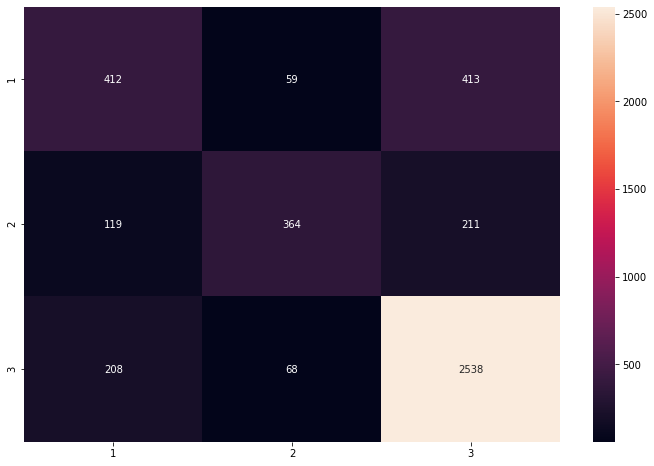

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index= [i for i in "123"], columns = [i for i in "123"])
plt.figure(figsize=(12,8))
sns.heatmap(df_cm, annot= True, fmt ='g')

b. Use TfidfVectorizer.

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
data_feature = vectorizer.fit_transform(df_text_new['text'])
data_feature = data_feature.toarray()
data_feature.shape

(14640, 1000)

In [163]:
labels = df_text_new.airline_sentiment
labels = labels.astype('int')

In [164]:
rfc = RandomForestClassifier(n_estimators= 10, n_jobs= 4)
rfc = rfc.fit (X_train, y_train)
print(rfc)
print(np.mean(cross_val_score(rfc, data_feature, labels, cv = 10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.715915300546448


In [165]:
result = rfc.predict(X_test)

[[ 412   60  412]
 [ 107  376  211]
 [ 210   71 2533]]


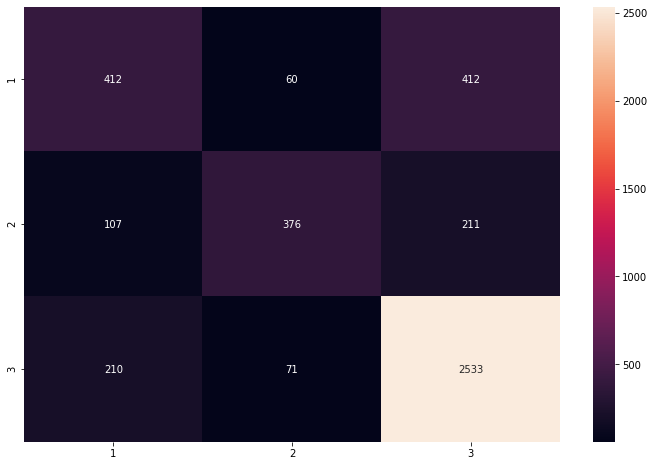

In [166]:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index= [i for i in "123"], columns = [i for i in "123"])
plt.figure(figsize=(12,8))
sns.heatmap(df_cm, annot= True, fmt ='g')

TfidfVectorizer and CountVectorizer both are methods for converting text data into vectors as model can process only numerical data.

In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.

To overcome this , we use TfidfVectorizer .

In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.

In the aspect of the model above, both of the vectorizations worked almost same.